In [33]:
#Import the library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:

#Read the file
xlsx = pd.ExcelFile('Dataset.xlsx')

#read the data from local directory
data = pd.read_excel(xlsx, 'Dataset')
Originaldataset=data

#view data sample
data.head()

,Student.ID,Teacher.ID,College.Name,School.Name,Student.Message.Time,Teacher.Response.Time
0,*655EE4254CD6751292CEB436540F99EEDD7CF3C3,*1C06EF8D2A0EA85EE88F9A2CD2185BF0A0E85A9E,NaN,NaN,2018-12-26 13:42:58,2019-01-02 08:06:11
1,*A852E7F5D89AA564AF4DA87FE95D9947A3967CEC,*1267BF7A2516009C89642925A67CCA0EE89777A0,C-BUS,Business IT & Logistics,2019-01-01 10:05:35,2019-01-01 11:07:08
2,*D02DA5003C7D760F169B58CDF9B94956C6317FCE,*1267BF7A2516009C89642925A67CCA0EE89777A0,C-BUS,Business IT & Logistics,2019-01-01 10:07:16,2019-01-01 11:10:31
3,*A4A1C43AC047FD6DE7833944F43ABDF9C9D2AAC2,*1267BF7A2516009C89642925A67CCA0EE89777A0,C-BUS,Business IT & Logistics,2019-01-01 23:43:32,2019-01-02 00:48:09
4,*E7050ECAA958D2CD2763EE483E16FD9140D49E97,*BD13E5C24441890B281DB9F75A747D9673210ACD,C-BUS,Management,2019-01-02 03:41:35,2019-01-03 01:16:52


In [35]:
#check the dimension
data.shape

(66009, 6)

In [36]:
#check the datatypes
data.dtypes

Student.ID                       object
Teacher.ID                       object
College.Name                     object
School.Name                      object
Student.Message.Time     datetime64[ns]
Teacher.Response.Time    datetime64[ns]
dtype: object

In [37]:
#create the column Timeliness to the original data set 
data['Timeliness']=data['Teacher.Response.Time']-data['Student.Message.Time']

#delete student message time and teacher response time
del data['Teacher.Response.Time']
del data['Student.Message.Time']

#View the resultant dataset
data.head()

,Student.ID,Teacher.ID,College.Name,School.Name,Timeliness
0,*655EE4254CD6751292CEB436540F99EEDD7CF3C3,*1C06EF8D2A0EA85EE88F9A2CD2185BF0A0E85A9E,NaN,NaN,6 days 18:23:13
1,*A852E7F5D89AA564AF4DA87FE95D9947A3967CEC,*1267BF7A2516009C89642925A67CCA0EE89777A0,C-BUS,Business IT & Logistics,0 days 01:01:33
2,*D02DA5003C7D760F169B58CDF9B94956C6317FCE,*1267BF7A2516009C89642925A67CCA0EE89777A0,C-BUS,Business IT & Logistics,0 days 01:03:15
3,*A4A1C43AC047FD6DE7833944F43ABDF9C9D2AAC2,*1267BF7A2516009C89642925A67CCA0EE89777A0,C-BUS,Business IT & Logistics,0 days 01:04:37
4,*E7050ECAA958D2CD2763EE483E16FD9140D49E97,*BD13E5C24441890B281DB9F75A747D9673210ACD,C-BUS,Management,0 days 21:35:17


In [38]:
#check for missing data
data.isnull().sum()

# From the results its clear that 13664(20% of total) college names and corresponding school names are missing,So at the 
#college level data exploration, its better to get rid of these rows and proceed with the available school names.Missing 
#value replacement is not an ideal method in this scenario.

Student.ID          0
Teacher.ID          0
College.Name    13664
School.Name     13664
Timeliness          0
dtype: int64

In [39]:
# eliminating rows with missing data
data=data.dropna()

#check the shape of new dataset
data.shape #66009-13664

(52345, 5)

In [40]:
# High level descripton
data.describe(include='all')

#no of students=14032
#no of teachers=2659
#no of colleges=5
#no of school=29

,Student.ID,Teacher.ID,College.Name,School.Name,Timeliness
count,52345,52345,52345,52345,52345
unique,14032,2659,5,29,NaN
top,*CDDDA25642379B9D39DE456F67B187DE81E57B4B,*29B44B3B5378CC21252E88B24745828720C420AB,C-BUS,Science,NaN
freq,236,572,18130,7736,NaN
mean,NaN,NaN,NaN,NaN,1 days 04:02:05.901958
std,NaN,NaN,NaN,NaN,4 days 13:09:47.407007
min,NaN,NaN,NaN,NaN,0 days 00:00:05
25%,NaN,NaN,NaN,NaN,0 days 00:30:41
50%,NaN,NaN,NaN,NaN,0 days 04:02:33
75%,NaN,NaN,NaN,NaN,0 days 19:15:57


In [41]:
#Unique values in each column 
data.nunique()

#no of students=14032
#no of teachers=2659
#no of colleges=5
#no of school=29

Student.ID      14032
Teacher.ID       2659
College.Name        5
School.Name        29
Timeliness      33509
dtype: int64

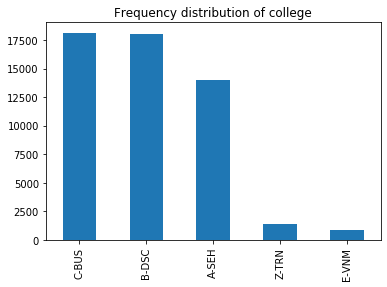

In [42]:
#Univariate Analysis
#Frequency distribution of College 
data['College.Name'].value_counts().plot.bar(title='Frequency distribution of college')

#The barplot shows the frequency distribution of college across all the rows.It shows  C-BUS and B-DSC have the most frequency 
#followed by A-SEH.z-TRN and E-VNM are the least among these 5.

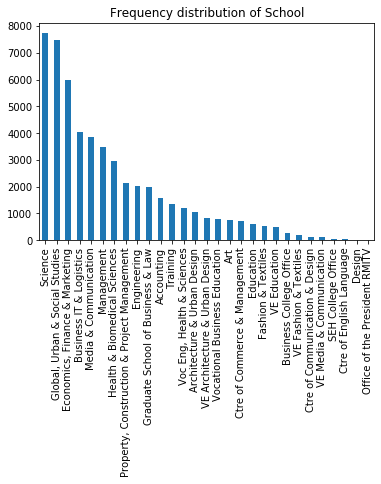

In [43]:
#FREQUENCY DISTRIBUTION OF SCHOOL
data['School.Name'].value_counts().plot.bar(title='Frequency distribution of School')

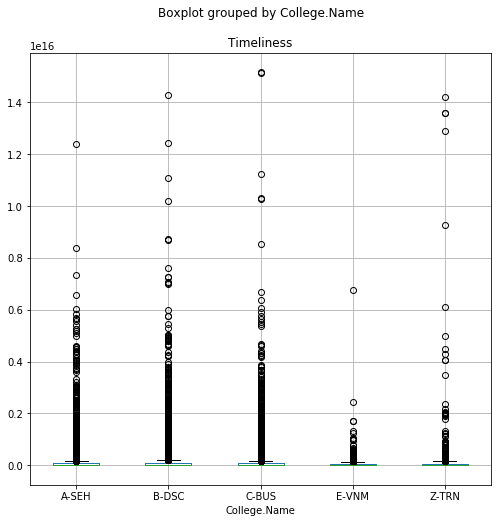

In [44]:
#visualise Timeliness across college 
#without removing outliers
data.boxplot(column="Timeliness",        # Column to plot
                 by= "College.Name",         # Column to split upon
                 figsize= (8,8))        # Figure size

#Here we can see many ouliers, these outliers have to be removed for further analysis

In [45]:
#Statistical quantile analysis
data.describe()

,Timeliness
count,52345
mean,1 days 04:02:05.901958
std,4 days 13:09:47.407007
min,0 days 00:00:05
25%,0 days 00:30:41
50%,0 days 04:02:33
75%,0 days 19:15:57
max,175 days 09:59:20


In [46]:
#------------------------------------------------------------------------------
# accept a dataframe, remove outliers, return cleaned data in a new dataframe
#------------------------------------------------------------------------------
def remove_outlier(df_in, col_name):
    q1 = data[col_name].quantile(0.25)
    q3 = data[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = data.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

#call function to remove otliers
data_out=remove_outlier(data, 'Timeliness')

#view the shape
data_out.shape


(46214, 5)

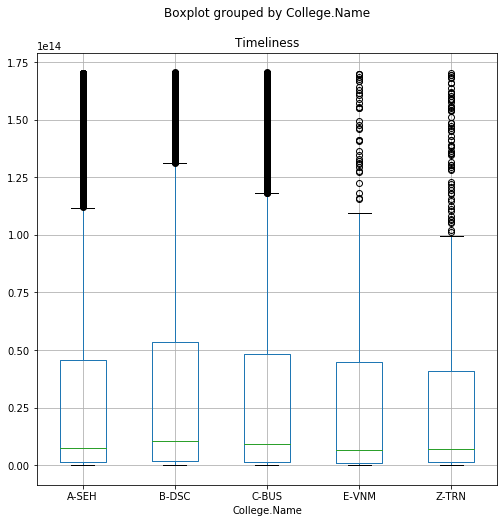

In [47]:
#visualise Timeliness across college 
#without removing outliers
data_out.boxplot(column="Timeliness",        # Column to plot
                 by= "College.Name",         # Column to split upon
                 figsize= (8,8))        # Figure size

In [48]:
#check for datatypes

data_out.dtypes

Student.ID               object
Teacher.ID               object
College.Name             object
School.Name              object
Timeliness      timedelta64[ns]
dtype: object

In [49]:
#convert the TIMELINESS TO SECONDS

data_out['Timeliness_second']=data_out['Timeliness'].astype('timedelta64[s]')

C:\Users\ADMIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [50]:
#chec sample output
data_out.head()

,Student.ID,Teacher.ID,College.Name,School.Name,Timeliness,Timeliness_second
1,*A852E7F5D89AA564AF4DA87FE95D9947A3967CEC,*1267BF7A2516009C89642925A67CCA0EE89777A0,C-BUS,Business IT & Logistics,01:01:33,3693.0
2,*D02DA5003C7D760F169B58CDF9B94956C6317FCE,*1267BF7A2516009C89642925A67CCA0EE89777A0,C-BUS,Business IT & Logistics,01:03:15,3795.0
3,*A4A1C43AC047FD6DE7833944F43ABDF9C9D2AAC2,*1267BF7A2516009C89642925A67CCA0EE89777A0,C-BUS,Business IT & Logistics,01:04:37,3877.0
4,*E7050ECAA958D2CD2763EE483E16FD9140D49E97,*BD13E5C24441890B281DB9F75A747D9673210ACD,C-BUS,Management,21:35:17,77717.0
5,*A576925C8ED8D612F26322A6CF857E195B6297F3,*A824F809F70F28C4D923F712E44E8188A75D33C6,C-BUS,"Economics, Finance & Marketing",21:48:08,78488.0


C:\Users\ADMIN\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


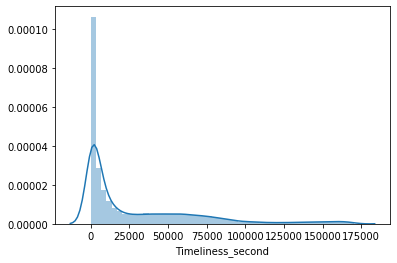

In [51]:
#density plot of timeliness
sns.distplot(data_out['Timeliness_second'],bins=50)

#Density of timeliness reduces dramatically after 25000/50000
#Better response rime is always have the lower timeliness values.So for further analysis, deviding the dataset into two, with
#timeliness less than 50000 seconds and timeliness greater than 50000 seconds.


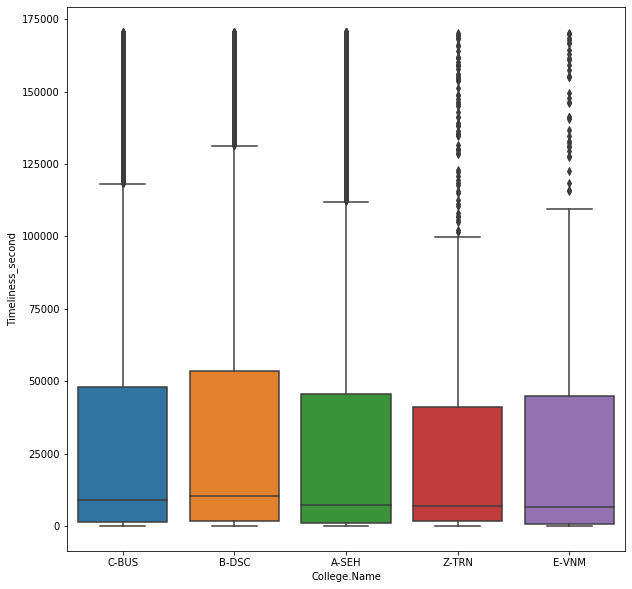

In [52]:
#box plot of Timeliness according to college
plt.figure(figsize=(10, 10))
sns.boxplot(x="College.Name", y="Timeliness_second", data=data_out);

#From the box plot its clear that the upper bound of all the graphs is around 50000 seconds


In [53]:
#Quantile statistics of Timeliness across different colleges

data_out.groupby("College.Name")["Timeliness_second"].describe().reset_index()

,College.Name,count,mean,std,min,25%,50%,75%,max
0,A-SEH,12371.0,28084.751111,38749.248201,5.0,1174.00,7415.0,45473.50,170475.0
1,B-DSC,15572.0,31395.940791,40455.147348,18.0,1603.75,10378.5,53514.50,170577.0
2,C-BUS,16279.0,28901.098532,38286.117516,6.0,1407.00,9175.0,48158.00,170571.0
3,E-VNM,786.0,26999.876590,37387.889691,69.0,890.00,6537.5,44935.00,170112.0
4,Z-TRN,1206.0,26053.670813,36861.599312,29.0,1592.25,6902.0,41070.75,170203.0


In [54]:
#Binning the timeliness
#Change timeliness into categorical variableTimelinessBin
cut_labels_6 = ['<5m', '5m-15m', '15m-30m', '30m-1hr','1hr-1day','>1day']
cut_bins = [0, 300, 900, 1800, 36000,86400,170577]
data_out['TimelinessBin'] = pd.cut(data_out['Timeliness_second'], bins=cut_bins, labels=cut_labels_6)

C:\Users\ADMIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [55]:
#Check the timeliness bins values
data_out['TimelinessBin'].unique()

-1hr, 1hr-1day, 5m-15m, <5m, 15m-30m, >1day]
Categories (6, object): [<5m < 5m-15m < 15m-30m < 30m-1hr < 1hr-1day < >1day]

Text(0.5, 1, 'Count distribution of Timeliness Across College')

<Figure size 864x864 with 0 Axes>

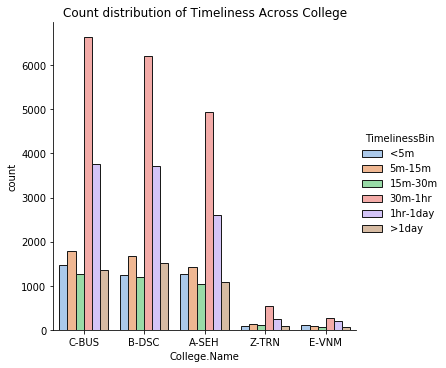

In [56]:
#Plot the timeliness across different colleges
plt.figure(figsize=(12, 12))
sns.catplot(x="College.Name", hue="TimelinessBin", kind="count",
            palette="pastel", edgecolor=".1",
            data=data_out);
plt.title("Count distribution of Timeliness Across College")
#Since this shows only the no of responses across each bin and not a percentage information across total, we cannnot compare the 
#distribution of timeliness properly across colleges.So, for better understanding and visibility, convert the timeliness into 
#percentage and displaying below

<function matplotlib.pyplot.show(*args, **kw)>

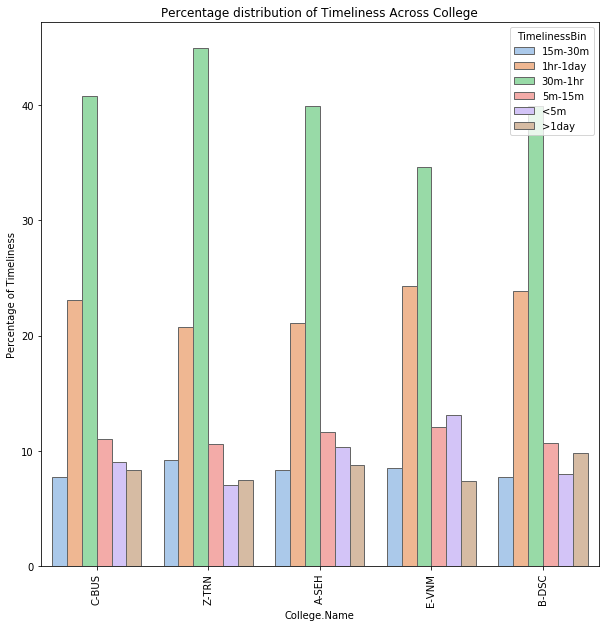

In [57]:
#Display percentage of timeliness across college
plt.figure(figsize=(10, 10))
timeliness_counts = (data_out.groupby(['College.Name'])['TimelinessBin']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('TimelinessBin'))
p = sns.barplot(x="College.Name", y="percentage", hue="TimelinessBin", data=timeliness_counts,palette="pastel", edgecolor=".4")
_ = plt.setp(p.get_xticklabels(), rotation=90)  # Rotate labels
plt.title("Percentage distribution of Timeliness Across College")
plt.ylabel("Percentage of Timeliness")
plt.show

In [62]:
#Percentage of Performance across different Colleges
timeliness_counts.sort_values('College.Name')

,College.Name,TimelinessBin,percentage
5,A-SEH,15m-30m,8.309757
3,A-SEH,<5m,10.314445
1,A-SEH,1hr-1day,21.121979
2,A-SEH,5m-15m,11.583542
0,A-SEH,30m-1hr,39.915932
4,A-SEH,>1day,8.754345
9,B-DSC,>1day,9.767531
11,B-DSC,15m-30m,7.693296
10,B-DSC,<5m,8.001541
7,B-DSC,1hr-1day,23.901875
